# Mean Shift Clustering

In [6]:
%matplotlib inline
from ndreg import *
import matplotlib
import matplotlib.pyplot as plt
import ndio.remote.neurodata as neurodata
import numpy as np
import cv2
import nibabel as nib

import plotly
import plotly.graph_objs as graphobjs

import image_utils

import project_utils as p_utils

# MS Clustering code

In [7]:
MIN_DISTANCE = 0.000001
# MIN_DISTANCE = 0.4

def cluster(points, kernel_bandwidth = 1):
    shift_points = points
    max_min_dist = 1
    prev_max_min_dist = 0
    iteration_number = 0

    # points.shape[0] is the number of points
    # still_shifting is initialized to an array of True values.
    still_shifting = [True] * points.shape[0]
    while max_min_dist > MIN_DISTANCE:
        print max_min_dist
        
        if max_min_dist == prev_max_min_dist:
            break
        
        prev_max_min_dist = max_min_dist
        max_min_dist = 0
        for i in range(0, len(shift_points)):
            if not still_shifting[i]:
                continue
            p_new = shift_points[i]
            p_new_start = p_new
            p_new = shift_point(p_new, points, kernel_bandwidth)
            dist = euc_dist(p_new, p_new_start)
            if dist > max_min_dist:
                max_min_dist = dist
            if dist < MIN_DISTANCE:
                still_shifting[i] = False
            shift_points[i] = p_new
        
    return shift_points
    # group_assignments = group_points(shift_points.tolist())
    # iteration_number += 1
    # return MeanShiftResult(points, shift_points, group_assignments)


def shift_point(point, points, kernel_bandwidth):
    # from http://en.wikipedia.org/wiki/Mean-shift
    points = np.array(points)
    # numerator
    point_distances = np.sqrt(((point - points) ** 2).sum(axis=1))
    point_weights = gaussian_kernel(point_distances, kernel_bandwidth)
    tiled_weights = np.tile(point_weights, [len(point), 1])
    # denominator
    denominator = sum(point_weights)
    shifted_point = np.multiply(tiled_weights.transpose(), points).sum(axis=0) / denominator
    return shifted_point

def gaussian_kernel(distance, bandwidth):
    val = (1/(bandwidth*math.sqrt(2*math.pi))) * np.exp(-0.5*((distance / bandwidth))**2)
    return val

def euc_dist(vect1, vect2):
    """ Find and returns the euclidian distance between 2 numpy arrays. """
    return np.linalg.norm(vect1 - vect2)

# With histeq

In [22]:
histeq_full_points = image_utils.load_csv('points/Fear199_histeq_full.csv')
histeq_low_points = image_utils.load_csv('points/Fear199_histeq_low.csv')
histeq_high_points = image_utils.load_csv('points/Fear199_histeq_high.csv')

In [23]:
print(histeq_high_points.shape)

(3825, 4)


In [24]:
image_utils.array_to_plot(histeq_full_points, point_size=1.5, outfile_name='Fear199_histeq_full')
image_utils.array_to_plot(histeq_low_points, point_size=1.5, outfile_name='Fear199_histeq_low')
image_utils.array_to_plot(histeq_high_points, point_size=1.5, outfile_name='Fear199_histeq_high')

In [28]:
shifted_histeq_full_pts = cluster(histeq_full_points[:,:3], 1)
shifted_histeq_low_pts = cluster(histeq_low_points[:,:3], 1)
shifted_histeq_high_pts = cluster(histeq_high_points[:,:3], 1)

1
0.599461250444
0.599465994629
0.694014331779
0.744907307067
0.741943264497
0.792921373628
0.751008989778
0.893236991887
0.888115856961
0.830875377851
0.796442372462
0.796442372461
0.888115856963
0.784444851025
0.602595755454
0.543733256545
0.543733256545
1
0.599461250425
0.599465994629
0.599465992688
0.599470590418
0.741943264497
0.741943264497
0.742155331668
0.789003061341
0.888115856961
0.830875377851
0.796442372462
0.796442372461
0.888115856963
0.784444851025
0.602595755454
0.543733256484
0.543733256484
1
0.599461250444
0.548137413651
0.694014331779
0.744907307067
0.706412878408
0.792921373628
0.751008989778
0.893236991887
0.773706950569
0.773879295155
0.754301823432
0.767459190327
0.769041806333
0.709103639863
0.380340605585
0.380340605585


In [29]:
resolution = (0.01872, 0.01872, 0.005)
image_utils.array_to_plot(shifted_histeq_full_pts, point_size=1.5, outfile_name='Fear199_histeq_full_shifted')
image_utils.array_to_plot(shifted_histeq_low_pts, point_size=1.5, outfile_name='Fear199_histeq_low_shifted')
image_utils.array_to_plot(shifted_histeq_high_pts, point_size=1.5, outfile_name='Fear199_histeq_high_shifted')

In [30]:
print(histeq_high_points.shape)
print(shifted_histeq_high_pts.shape)

(3825, 4)
(3825, 3)


# Without histeq

In [22]:
histeq_full_points = image_utils.load_csv('points/Fear199_histeq_full.csv')
histeq_low_points = image_utils.load_csv('points/Fear199_histeq_low.csv')
histeq_high_points = image_utils.load_csv('points/Fear199_histeq_high.csv')

In [23]:
print(histeq_high_points.shape)

(3825, 4)


In [24]:
image_utils.array_to_plot(histeq_full_points, point_size=1.5, outfile_name='Fear199_histeq_full')
image_utils.array_to_plot(histeq_low_points, point_size=1.5, outfile_name='Fear199_histeq_low')
image_utils.array_to_plot(histeq_high_points, point_size=1.5, outfile_name='Fear199_histeq_high')

In [28]:
shifted_histeq_full_pts = cluster(histeq_full_points[:,:3], 1)
shifted_histeq_low_pts = cluster(histeq_low_points[:,:3], 1)
shifted_histeq_high_pts = cluster(histeq_high_points[:,:3], 1)

1
0.599461250444
0.599465994629
0.694014331779
0.744907307067
0.741943264497
0.792921373628
0.751008989778
0.893236991887
0.888115856961
0.830875377851
0.796442372462
0.796442372461
0.888115856963
0.784444851025
0.602595755454
0.543733256545
0.543733256545
1
0.599461250425
0.599465994629
0.599465992688
0.599470590418
0.741943264497
0.741943264497
0.742155331668
0.789003061341
0.888115856961
0.830875377851
0.796442372462
0.796442372461
0.888115856963
0.784444851025
0.602595755454
0.543733256484
0.543733256484
1
0.599461250444
0.548137413651
0.694014331779
0.744907307067
0.706412878408
0.792921373628
0.751008989778
0.893236991887
0.773706950569
0.773879295155
0.754301823432
0.767459190327
0.769041806333
0.709103639863
0.380340605585
0.380340605585


In [29]:
resolution = (0.01872, 0.01872, 0.005)
image_utils.array_to_plot(shifted_histeq_full_pts, point_size=1.5, outfile_name='Fear199_histeq_full_shifted')
image_utils.array_to_plot(shifted_histeq_low_pts, point_size=1.5, outfile_name='Fear199_histeq_low_shifted')
image_utils.array_to_plot(shifted_histeq_high_pts, point_size=1.5, outfile_name='Fear199_histeq_high_shifted')

In [30]:
print(histeq_high_points.shape)
print(shifted_histeq_high_pts.shape)

(3825, 4)
(3825, 3)


In [37]:
shifted_pts = cluster(brain_pts[:,:3], 0.5)

1
0.548137238122
0.238405844044
0.377540668798
0.377540668798


In [39]:
print(shifted_pts.shape)
print(shifted_pts)

(1021, 3)
[[ 25 152 295]
 [ 26 133 293]
 [ 26 153 265]
 ..., 
 [327 132 309]
 [333 126 340]
 [343 120 310]]


In [40]:
print(brain_pts)

[[ 25 152 295 103]
 [ 26 133 293 148]
 [ 26 153 265 145]
 ..., 
 [327 132 309 114]
 [333 126 340 144]
 [343 120 310 141]]


In [54]:
resolution = (0.01872, 0.01872, 0.005)
p_utils.array_to_plot(shifted_pts, "Fear199", resolution, outfile_name="Fear199_shifted")

In [53]:
import project_utils as p_utils
reload(p_utils)

<module 'project_utils' from 'project_utils.py'>

In [50]:
p_utils.array_to_plot(brain_pts, "Fear199", resolution, outfile_name="Fear199_brain")

In [ ]:
1

In [55]:
pts = p_utils.load_csv('points/Fear199_points.csv')
br_pts = pts[pts[:, 3] < 150]
p_utils.array_to_plot(br_pts, "Fear199", resolution, outfile_name="Fear199_brain2")

# bandwidth of 0.5

In [57]:
shifted_pts_2 = cluster(brain_pts[:,:3], 0.75)

1
0.451220222568
0.319060879186
0.170507318189
0.170507318189


In [58]:
p_utils.array_to_plot(shifted_pts_2, "Fear199", resolution, outfile_name="Fear199_shifted2")

In [71]:
print(np.max(pts[:, 2]))
print(np.min(pts[:, 2]))

536
10


In [72]:
print(pts[:,0].shape)
print(pts[:,0])
print pts.shape
print pts

(9945,)
[  0   0   0 ..., 382 382 382]
(9945, 4)
[[  0  32 324 255]
 [  0  46 456 200]
 [  0 176 266 249]
 ..., 
 [382 230 528 255]
 [382 250 173 252]
 [382 258 267 252]]


In [84]:
print(np.max(pts[:,0]))
print(np.min(pts[:,0]))

IndexError: invalid index to scalar variable.

In [74]:
print(np.max(pts[:,1]))
print(np.min(pts[:,1]))

271
0


(383, 272)


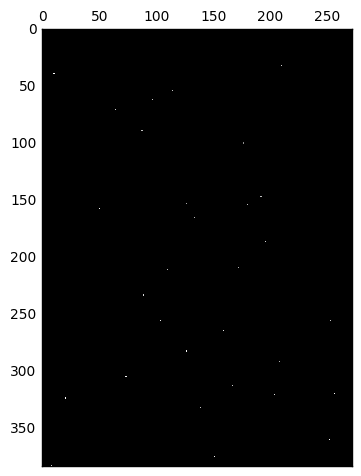

In [86]:
pts_slice = pts[pts[:,2] == 200]
# print(pts_slice)

mtx_slice = np.zeros((np.max(pts[:,0]) + 1, np.max(pts[:,1]) + 1))

print mtx_slice.shape

for row in pts_slice:
    x = row[0]
    y = row[1]
    value = row[3]
    mtx_slice[x,y] = value


plt.matshow(mtx_slice, fignum=100, cmap=plt.cm.gray)


In [90]:
np.set_printoptions(threshold=np.nan)
print(mtx_slice)

[[   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.    0.    0.    0. 

In [91]:
print(mtx_slice)

[[   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.    0.    0.    0. 

# Running no with histeq

In [34]:
# plotting no histeq
# full image
temp_file_path = "img/" + "Fear199" + ".nii"

# Downsampled image
# temp_file_path = "img/" + inToken + "_ds.nii"

# Histogram Equilized image
# temp_file_path = "histeq/" + inToken + "_histeq.nii"

num_points = 7500

temp_img = nib.load(temp_file_path)

## Sanity check for shape
temp_img.shape

## Convert into np array (or memmap in this case)
temp_data = temp_img.get_data()
temp_shape = temp_img.shape
temp_max = np.max(temp_data)

print('shape:')
print temp_data.shape
print type(temp_data)

print('max:')
print(temp_max)

# print(temp_data)

temp_threshold = 0.01
filt = temp_data > temp_threshold * temp_max
# filt = temp_data

data_points = np.where(filt)
x = data_points[0]
y = data_points[1]
z = data_points[2]

intens = temp_data[filt]
intens = np.int16(255 * (np.float32(intens) / np.float32(temp_max)))

intens_shape = intens.shape

total_points = intens.shape[0]

fraction = num_points / float(total_points)

if fraction < 1.0:
    # np.random.random returns random floats in the half-open interval [0.0, 1.0)
    filt = np.random.random(size=intens_shape) < fraction
    print('v.shape:')
    print(intens_shape)
    print('x.size before filter: %d' % x.size)
    print('y.size before filter: %d' % y.size)
    print('z.size before filter: %d' % z.size)
    print('v.size before filter: %d' % intens.size)
    x = x[filt]
    y = y[filt]
    z = z[filt]
    intens = intens[filt]
    print('x.size after filter: %d' % x.size)
    print('y.size after filter: %d' % y.size)
    print('z.size after filter: %d' % z.size)
    print('v.size after filter: %d' % intens.size)


temp_points = np.vstack([x, y, z, intens])
temp_points = np.transpose(temp_points)
print("Num Points: %d"%(temp_points.shape[0]))


shape:
(405, 272, 537)
<class 'numpy.core.memmap.memmap'>
max:
3969
v.shape:
(5423879,)
x.size before filter: 5423879
y.size before filter: 5423879
z.size before filter: 5423879
v.size before filter: 5423879
x.size after filter: 7597
y.size after filter: 7597
z.size after filter: 7597
v.size after filter: 7597
Num Points: 7597


In [35]:
# plotting raw
image_utils.array_to_plot(temp_points, resolution, 1.5, outfile_name="Fear199_nohisteq")

In [36]:
shifted_pts_raw = cluster(temp_points[:,:3], 1)

1
0.527520742956
0.741943264497
0.710513207314
0.749278077538
0.84200907224
0.912223638099
0.916145324701
0.955246950047
0.958277460621
1.04528902428
0.973274498485
1.05597317422
1.02862656944
0.939645909107
1.01864661998
0.879424205949
0.901126095605
0.835037008018
0.709667836777
0.587063242045
0.587063242045


In [37]:
p_utils.array_to_plot(shifted_pts_raw, resolution, 1.5, outfile_name="Fear199_nohisteq_shifted")

In [99]:
import project_utils as p_utils
reload(p_utils)

<module 'project_utils' from 'project_utils.py'>